# CLASSIFICATION

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import random
import cv2
import pickle
from tqdm import tqdm

In [3]:
images = []
number_of_errors = 0
number_of_processed = 0

In [4]:
dir = "S:\Downloads\data sets\eardrumDs\eardrumDs"
for class_name in os.listdir(dir):
    path_to_class = dir + "\\" + class_name
    for image in os.listdir(path_to_class):
        
        
        try:
            path_to_image = f"{path_to_class}/{image}"

            img = cv2.imread(path_to_image, 0)
            img = cv2.resize(img, (128,128))
            img = img/255
            images.append([img, int(class_name)])
            number_of_processed += 1
        except:
            number_of_errors += 1
        print(f"\rProcessed: {number_of_processed} | Erros: {number_of_errors}", end="")

Processed: 955 | Erros: 0

In [5]:
for _ in range(27):
    random.shuffle(images)

In [6]:
X = []
y = []

for image, idx in images:
    X.append(image)
    y.append(idx)
print(len(X))
print(len(y))

955
955


In [3]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [8]:
X_train = X[:777]
y_train = y[:777]

X_test = X[777:]
y_test = y[777:]

In [9]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

777
777
178
178


In [4]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
X_train = X_train.reshape(-1, 128, 128, 1) 
X_test = X_test.reshape(-1, 128, 128, 1) 

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(9, activation = 'softmax'))

In [13]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [14]:
# Compile the model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
25/25 [==============================] - 6s 240ms/step - loss: 1.8235 - accuracy: 0.4981 - val_loss: 1.4512 - val_accuracy: 0.5787
Epoch 2/40
25/25 [==============================] - 6s 229ms/step - loss: 1.5814 - accuracy: 0.5277 - val_loss: 1.4313 - val_accuracy: 0.5787
Epoch 3/40
25/25 [==============================] - 6s 226ms/step - loss: 1.5301 - accuracy: 0.5302 - val_loss: 1.4107 - val_accuracy: 0.5787
Epoch 4/40
25/25 [==============================] - 6s 228ms/step - loss: 1.5334 - accuracy: 0.5495 - val_loss: 1.4638 - val_accuracy: 0.5787
Epoch 5/40
25/25 [==============================] - 6s 228ms/step - loss: 1.5134 - accuracy: 0.5495 - val_loss: 1.3979 - val_accuracy: 0.5787
Epoch 6/40
25/25 [==============================] - 6s 226ms/step - loss: 1.4957 - accuracy: 0.5444 - val_loss: 1.3818 - val_accuracy: 0.5787
Epoch 7/40
25/25 [==============================] - 6s 227ms/step - loss: 1.4794 - accuracy: 0.5483 - val_loss: 1.3785 - val_accuracy: 0.5787
Epoch 

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 46ms/step - loss: 1.0496 - accuracy: 0.6910


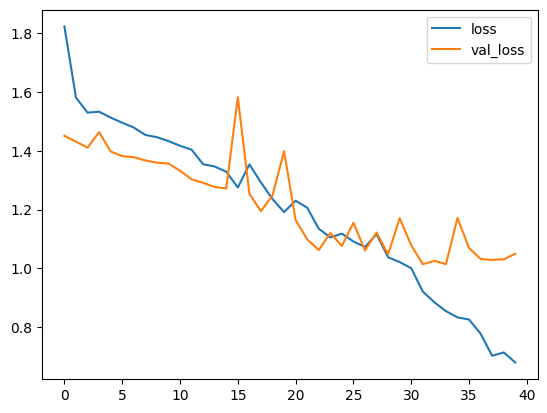

In [17]:
# Figure of the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

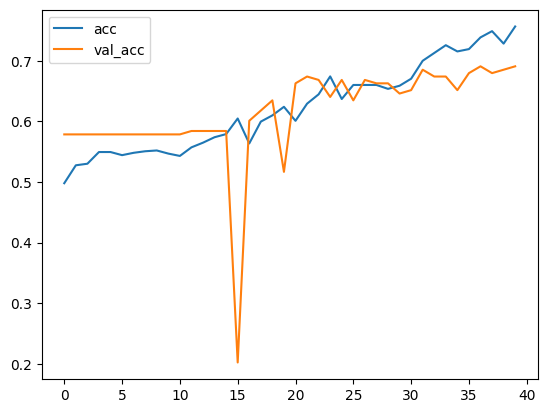

In [18]:
# Figure of the accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Predict the model
predictions = model.predict(X_test).argmax(axis=1)

6/6 [==============================] - 0s 45ms/step


Predicts

Text(0.5, 1.0, 'Predicted: 5 | Actual: 5')

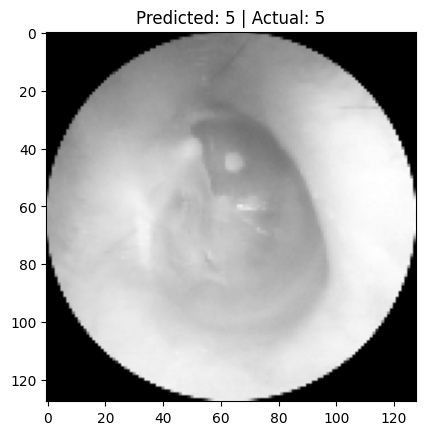

In [64]:
i = random.randint(0, len(X_test))
plt.imshow(X_test[i].reshape(128,128), cmap='gray')
plt.title(f"Predicted: {predictions[i]} | Actual: {y_test[i]}")

Wrong predicts

Text(0.5, 1.0, 'Predicted: 5 | Actual: 1')

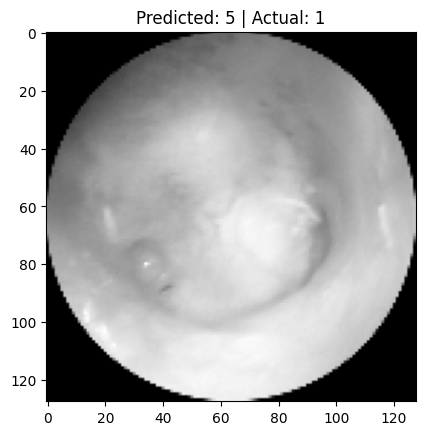

In [71]:
missclassified = np.where(predictions != y_test)[0]
i = random.choice(missclassified)
plt.imshow(X_test[i].reshape(128,128), cmap='gray')
plt.title(f"Predicted: {predictions[i]} | Actual: {y_test[i]}")

<AxesSubplot:>

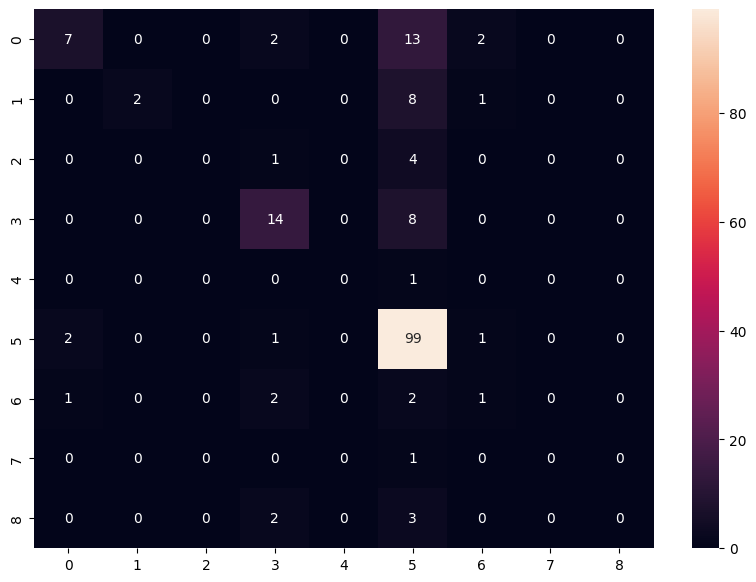

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(cm, range(9), range(9))
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


# GAN

In [2]:
klasor_adresi = "S:\\Downloads\\data sets\\eardrumDs\\eardrumDs\\0"


veri = []
process_success = 0
process_fail = 0

for resim_adi in tqdm(os.listdir(klasor_adresi)):
    resim_adresi = os.path.join(klasor_adresi, resim_adi)
    resim = cv2.imread(resim_adresi, cv2.IMREAD_COLOR)
    if(resim is not None):
        resim = cv2.resize(resim, (64, 64))
        veri.append([resim])
        process_success += 1
    else:
        process_fail += 1
    print(f"\rProcessed: {process_success} | Erros: {process_fail}", end="")


 44%|████▎     | 52/119 [00:00<00:00, 255.25it/s]

Processed: 52 | Erros: 0

 96%|█████████▌| 114/119 [00:00<00:00, 286.75it/s]

Processed: 114 | Erros: 0

100%|██████████| 119/119 [00:00<00:00, 280.15it/s]

Processed: 119 | Erros: 0

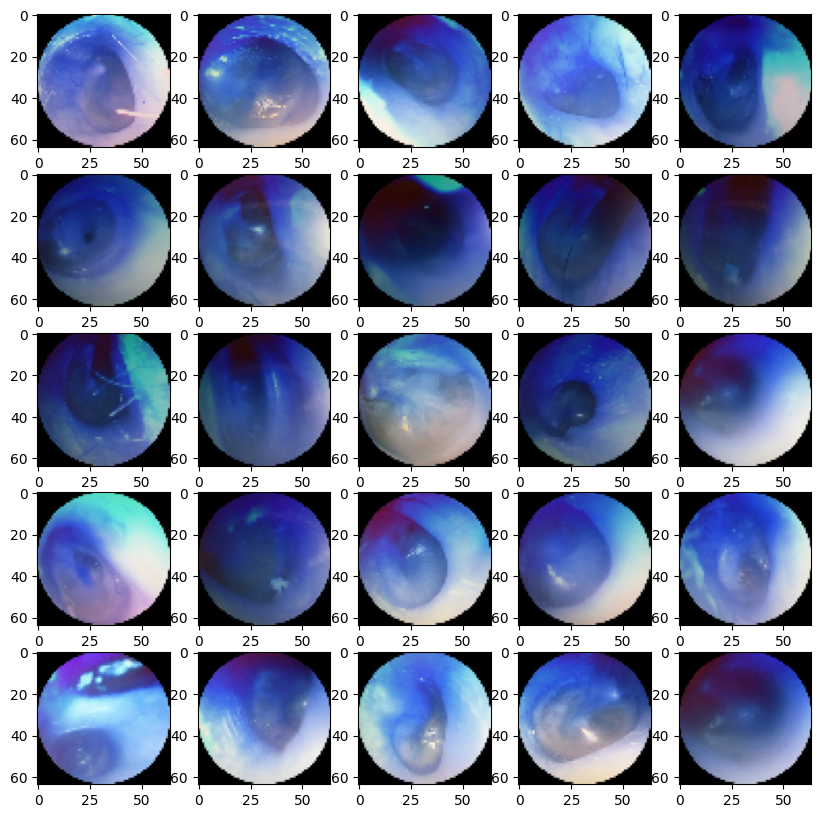

In [3]:
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(veri[i][0])

In [4]:
import numpy as np
veri = np.array(veri).reshape(-1, 64, 64, 3).astype('float32')
veri = (veri - 127.5) / 127.5

In [5]:
veri = tf.data.Dataset.from_tensor_slices(veri).batch(256)

In [6]:
initializer = tf.random_normal_initializer(0., 0.02)

gen = tf.keras.Sequential()

gen.add(tf.keras.layers.Dense(4*4*512, use_bias=False, input_shape=(100,)))
gen.add(tf.keras.layers.BatchNormalization())
gen.add(tf.keras.layers.LeakyReLU())
gen.add(tf.keras.layers.Reshape((4, 4, 512)))

gen.add(tf.keras.layers.Conv2DTranspose(512, (3, 3), strides=(1, 1), padding='same',kernel_initializer = initializer, use_bias=False))
gen.add(tf.keras.layers.BatchNormalization())
gen.add(tf.keras.layers.LeakyReLU())

gen.add(tf.keras.layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False))
gen.add(tf.keras.layers.BatchNormalization())
gen.add(tf.keras.layers.LeakyReLU())

gen.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False))
gen.add(tf.keras.layers.BatchNormalization())
gen.add(tf.keras.layers.LeakyReLU())

gen.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False))
gen.add(tf.keras.layers.BatchNormalization())
gen.add(tf.keras.layers.LeakyReLU())

gen.add(tf.keras.layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False, activation='tanh'))



tf.Tensor(
[[-1.4108709e+00 -7.9783612e-01  1.6564533e+00 -4.7264487e-01
  -6.4100347e-02  1.3462068e+00  3.1129608e-01 -1.7392050e-01
  -7.8415209e-01 -4.5682019e-01 -1.3382607e+00 -4.5034388e-01
  -3.9992660e-01 -6.2788850e-01 -4.2628849e-01 -1.3032112e+00
  -1.2588472e+00  7.1649319e-01  2.5717940e+00  3.3481117e-02
  -1.1470229e-01 -6.7221262e-02  1.6650473e+00 -7.7259046e-01
  -7.5087124e-01  1.8739203e+00  6.2864864e-01 -5.5647619e-02
  -3.0312818e-01  4.4558784e-01 -1.2404317e+00 -5.4492116e-01
   4.3289065e-01 -1.7379138e+00 -2.3392439e+00 -1.2989806e+00
  -1.4058831e+00 -3.9592564e-01 -1.5095948e-01  1.0343949e+00
  -2.4152705e-01  9.6464944e-01 -4.0884650e-01 -1.0388081e+00
   8.8523984e-02  6.3123793e-04  5.9804034e-01 -9.0243226e-01
  -7.7645618e-01 -3.3977219e-01  1.2248029e+00 -3.9508969e-01
   1.0731276e+00  1.0665120e+00  1.6004660e+00 -2.8129581e-01
   9.9942409e-02 -1.7574042e+00 -1.2310634e+00  2.1046028e-02
  -1.4306396e+00  4.6216202e-01  1.0946506e+00  5.9033609e-

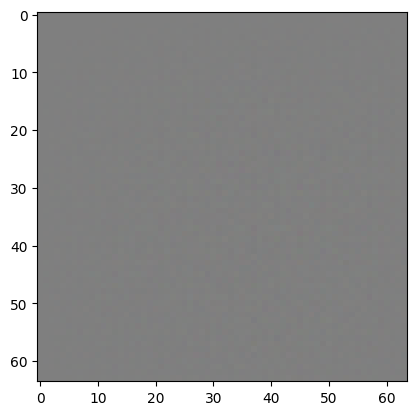

In [7]:
noise = tf.random.normal([1, 100])
print(noise)

test_resmi = gen(noise, training=False)
plt.imshow((test_resmi[0, :, :, :] + 1) / 2)

In [11]:
dis = tf.keras.Sequential()

dis.add(tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same',kernel_initializer = 
initializer, input_shape=[64, 64, 3], use_bias=False))
dis.add(tf.keras.layers.BatchNormalization())
dis.add(tf.keras.layers.LeakyReLU())
dis.add(tf.keras.layers.Dropout(0.3))

dis.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False))
dis.add(tf.keras.layers.BatchNormalization())
dis.add(tf.keras.layers.LeakyReLU())
dis.add(tf.keras.layers.Dropout(0.3))

dis.add(tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False))
dis.add(tf.keras.layers.BatchNormalization())
dis.add(tf.keras.layers.LeakyReLU())
dis.add(tf.keras.layers.Dropout(0.3))

dis.add(tf.keras.layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same',kernel_initializer = initializer, use_bias=False))
dis.add(tf.keras.layers.BatchNormalization())
dis.add(tf.keras.layers.LeakyReLU())
dis.add(tf.keras.layers.Dropout(0.3))

dis.add(tf.keras.layers.Flatten())
#!
dis.add(tf.keras.layers.Dense(1))

In [12]:
print(dis(test_resmi))

tf.Tensor([[0.00168461]], shape=(1, 1), dtype=float32)


In [13]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def dis_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def gen_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [14]:
gen_opt = tf.keras.optimizers.Adam(1e-4)
dis_opt = tf.keras.optimizers.Adam(1e-4)

In [15]:
@tf.function
def train_step(images):
    noise = tf.random.normal([256, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape:
        generated_images = gen(noise, training = True)
        real_output = dis(images, training = True)
        fake_output = dis(generated_images, training = True)
        gen_loss_val = gen_loss(fake_output)
        dis_loss_val = dis_loss(real_output, fake_output)
    grad_gen = gen_tape.gradient(gen_loss_val, gen.trainable_variables)
    grad_dis = dis_tape.gradient(dis_loss_val, dis.trainable_variables)
    gen_opt.apply_gradients(zip(grad_gen, gen.trainable_variables))
    dis_opt.apply_gradients(zip(grad_dis, dis.trainable_variables))

In [ ]:
from IPython import display
EPOCHS = 5000
seed = tf.random.normal([25, 100])
for epoch in range(EPOCHS):
    for image_batch in veri:
        train_step(image_batch)
    predictions = gen(seed, training=False)
    fig = plt.figure(figsize=(10,10))
    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i+1)
        plt.imshow((predictions[i, :, :, :] + 1) / 2)
        plt.axis('off')
    plt.show()
    veri.shuffle(10000)
    display.clear_output(wait=True)


tf.Tensor([[-4.462775]], shape=(1, 1), dtype=float32)


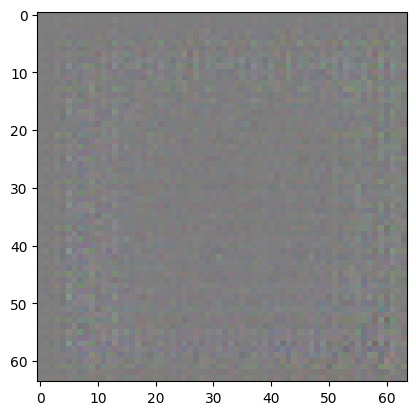

In [18]:
noise = tf.random.normal([1, 100])
test_resmi = gen(noise, training=False)
plt.imshow((test_resmi[0, :, :, :] + 1) / 2)
print(dis(test_resmi))